In [28]:
import pandas as pd

hit_file = "../ml/processed_events_small_all_pdg/all_showers.parquet"
train_data = pd.read_parquet(hit_file)

In [29]:
# group by event id and cacualte in two columns mean of primary kinnetic energy adn sum of kinnert energy
grouped_data = train_data.groupby('event_id').agg({
    'primary_kinetic_energy': 'mean',
    'kinetic_energy': 'sum'
}).reset_index()

/tmp/ipykernel_3091/716999961.py:11: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, grouped_data['primary_kinetic_energy'].max() * 1.1)
/tmp/ipykernel_3091/716999961.py:12: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, grouped_data['primary_kinetic_energy'].max() * 1.1)


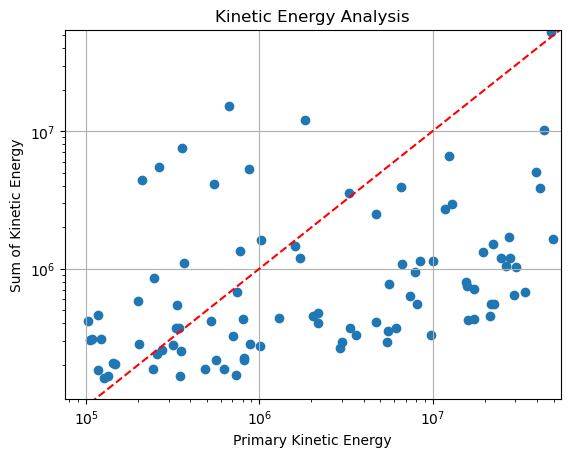

In [30]:
import matplotlib.pyplot as plt
# loglog scale plot

plt.scatter(grouped_data['primary_kinetic_energy'], grouped_data['kinetic_energy'])
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Primary Kinetic Energy')
plt.ylabel('Sum of Kinetic Energy')
plt.title('Kinetic Energy Analysis')
plt.xlim(0, grouped_data['primary_kinetic_energy'].max() * 1.1)
plt.ylim(0, grouped_data['primary_kinetic_energy'].max() * 1.1)
# plot line 0 to max
plt.plot([1e-1, grouped_data['primary_kinetic_energy'].max() * 1.1], [1e-1, grouped_data['primary_kinetic_energy'].max() * 1.1], color='red', linestyle='--')
plt.grid()
plt.show()

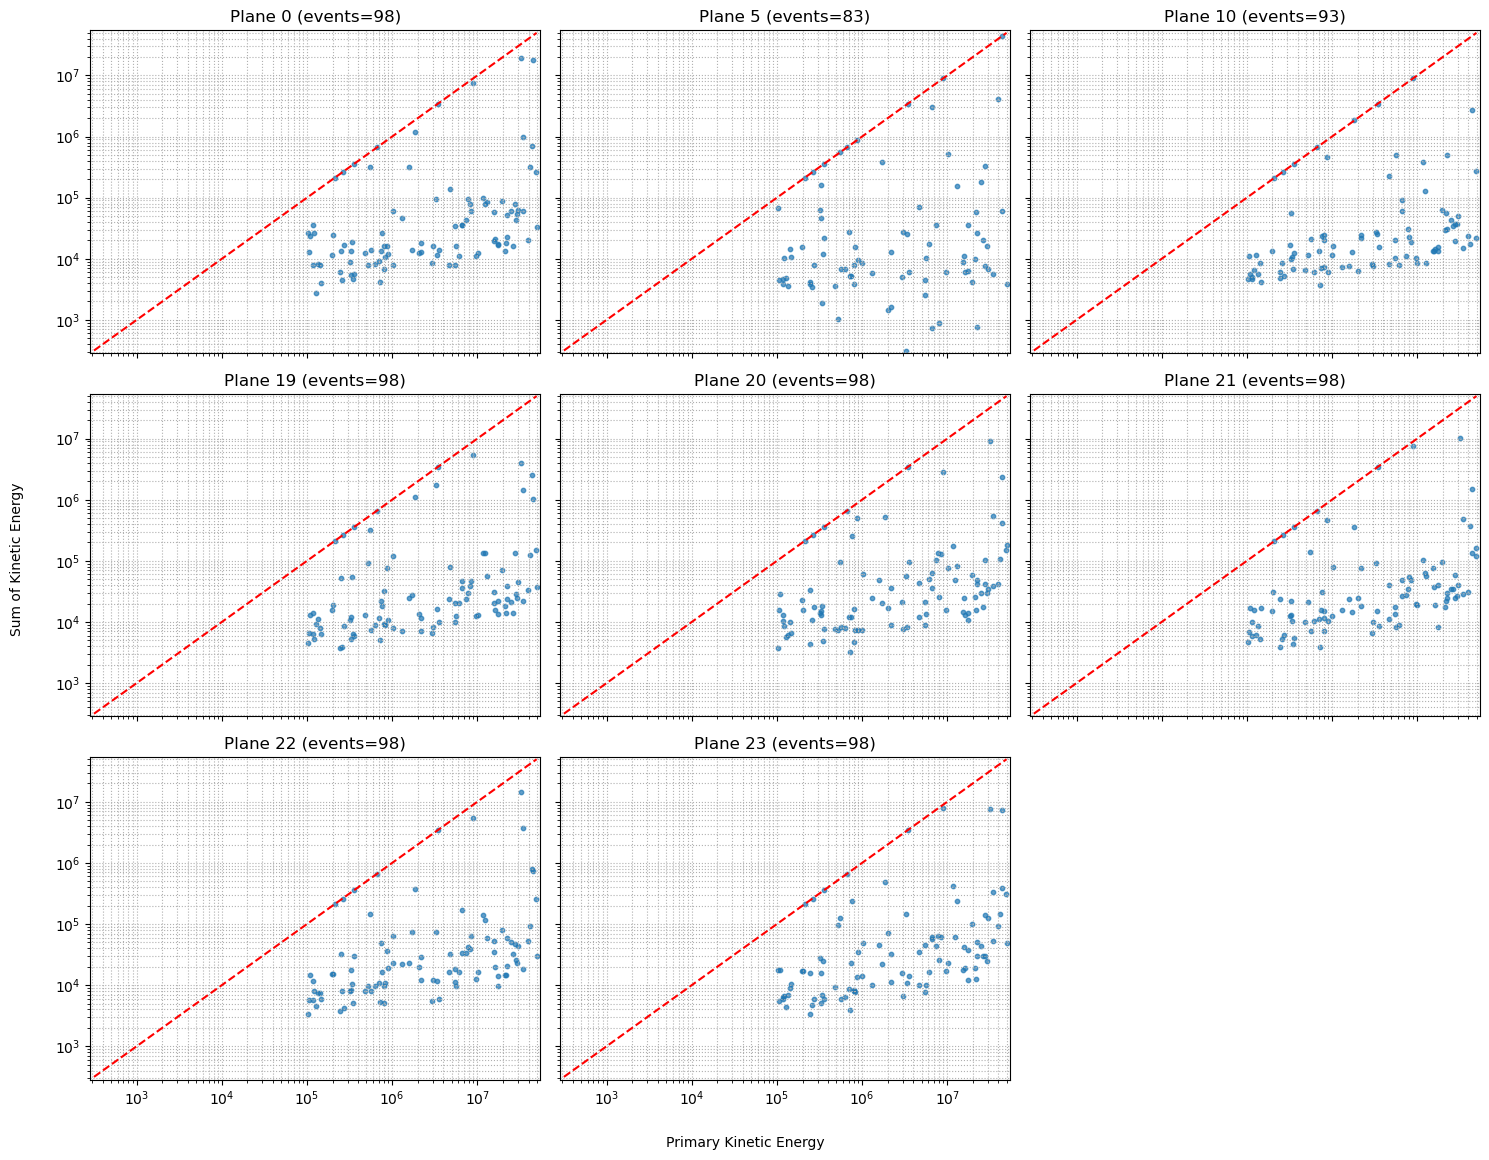

In [31]:
import numpy as np

import matplotlib.pyplot as plt

# choose planes to plot (modify as needed)
planes = [0,5,10,19, 20, 21, 22, 23]

# compute global sensible limits (avoid zeros for log scale)
global_min = np.inf
global_max = 0
for p in planes:
    dfp = train_data[train_data['plane'] == p]
    if dfp.empty:
        continue
    g = dfp.groupby('event_id').agg({
        'primary_kinetic_energy': 'mean',
        'kinetic_energy': 'sum'
    }).reset_index()
    mask = (g['primary_kinetic_energy'] > 0) & (g['kinetic_energy'] > 0)
    if mask.any():
        global_min = min(global_min, g.loc[mask, 'primary_kinetic_energy'].min(), g.loc[mask, 'kinetic_energy'].min())
        global_max = max(global_max, g.loc[mask, 'primary_kinetic_energy'].max(), g.loc[mask, 'kinetic_energy'].max())

if not np.isfinite(global_min):
    global_min = 1e-1
if global_max == 0:
    global_max = 1.0

# create subplots
n = len(planes)
cols = 3
rows = int(np.ceil(n / cols))
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows), sharex=True, sharey=True)
axes = axes.ravel()

for ax, p in zip(axes, planes):
    dfp = train_data[train_data['plane'] == p]
    if dfp.empty:
        ax.set_visible(False)
        continue
    g = dfp.groupby('event_id').agg({
        'primary_kinetic_energy': 'mean',
        'kinetic_energy': 'sum'
    }).reset_index()
    ax.scatter(g['primary_kinetic_energy'], g['kinetic_energy'], s=10, alpha=0.7)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title(f'Plane {int(p)} (events={g.shape[0]})')
    ax.plot([global_min, global_max], [global_min, global_max], color='red', linestyle='--')
    ax.set_xlim(global_min * 0.9, global_max * 1.1)
    ax.set_ylim(global_min * 0.9, global_max * 1.1)
    ax.grid(True, which='both', ls=':')

# hide any unused axes
for ax in axes[n:]:
    ax.set_visible(False)

fig.text(0.5, 0.01, 'Primary Kinetic Energy', ha='center')
fig.text(0.01, 0.5, 'Sum of Kinetic Energy', va='center', rotation='vertical')
plt.tight_layout(rect=[0.03, 0.03, 1, 0.97])
plt.show()